## Step 3: Preparing data for training

**Objectives**
- 3.1. Importing daily scores from news folder
- 3.2. Importing daily stock data from stock folder
- 3.3. Merge both the imported data with date
- 3.4. Saving the merged data
- 3.5. Check data by plotting the graph

In [41]:
import pandas as pd
import json

import matplotlib.pyplot as plt

### 3.1. Importing daily scores from news folder

In [31]:
with open('./data/news2023/daily_scores.json', 'r') as file:
    sentimentScores = json.load(file)
#endwith

dfSentiment = pd.DataFrame(list(sentimentScores.items()), columns=['jsonDate', 'sentiment'])
dfSentiment['date'] = pd.to_datetime(dfSentiment['jsonDate'], format='%Y-%m-%d')
dfSentiment.head()

,jsonDate,sentiment,date
0,2015-01-01,"[0.3070025146007538, 0.17011728882789612, 0.15...",2015-01-01
1,2015-01-02,"[0.282503217458725, 0.1561100333929062, 0.1806...",2015-01-02
2,2015-01-03,"[0.32533949613571167, 0.14950306713581085, 0.1...",2015-01-03
3,2015-01-04,"[0.32683512568473816, 0.17659184336662292, 0.1...",2015-01-04
4,2015-01-05,"[0.3772907555103302, 0.14218369126319885, 0.14...",2015-01-05


### 3.2. Importing daily stock data from stock folder
- Data used will be of Habib Bank Limited
- This bank is considered to be the top performing and one of the most profitable bank in the country
- This bank has branches outside Pakistan as well

In [32]:
csvFilePath = './data/stocks2023/hbl.csv'
dfCsv = pd.read_csv(csvFilePath)
dfCsv.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,HBL,01-Oct-2015,198.00,200.50,196.80,197.87,426600
1,HBL,02-Oct-2015,199.00,200.00,198.00,198.27,370300
2,HBL,05-Oct-2015,198.03,198.51,197.11,198.01,47900
3,HBL,06-Oct-2015,199.90,204.49,199.00,203.25,157300
4,HBL,07-Oct-2015,203.00,204.65,202.00,204.00,130400


### 3.3. Merge both the imported data with date

In [38]:
dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%d-%b-%Y')
dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')
dfSentimentColumns = pd.DataFrame(dfMerged['sentiment'].tolist(), columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])
dfMerged = pd.concat([dfMerged, dfSentimentColumns], axis=1)

dfMerged = dfMerged.drop(columns=['Symbol', 'date', 'sentiment', 'jsonDate'])
dfMerged.head()

,Date,Open,High,Low,Close,Volume,feature1,feature2,feature3,feature4,feature5
0,01-Oct-2015,198.00,200.50,196.80,197.87,426600,0.312187,0.163488,0.167254,0.178624,0.178447
1,02-Oct-2015,199.00,200.00,198.00,198.27,370300,0.299259,0.175934,0.165843,0.174329,0.184635
2,05-Oct-2015,198.03,198.51,197.11,198.01,47900,0.277948,0.170541,0.171659,0.191485,0.188367
3,06-Oct-2015,199.90,204.49,199.00,203.25,157300,0.327915,0.163137,0.156347,0.172104,0.180497
4,07-Oct-2015,203.00,204.65,202.00,204.00,130400,0.344828,0.175881,0.167450,0.156289,0.155552


### 3.4. Saving the merged data
- Saving the file in CSV format ([hbl_feat.csv](./data/stocks2023/hbl_feat.csv))

In [39]:
outputCsvPath = './data/stocks2023/hbl_feat.csv'
dfMerged.to_csv(outputCsvPath, index=False)

### 3.5. Check data by plotting the graph

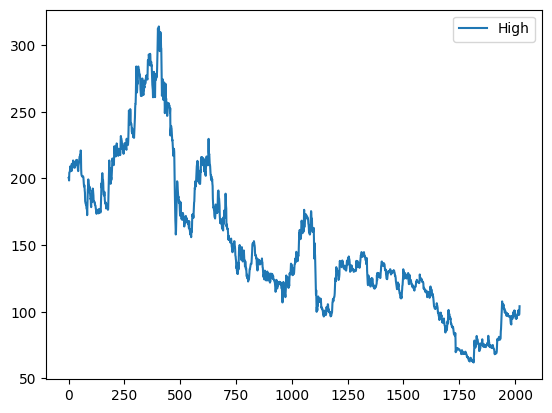

In [49]:
dfMerged[['High']].plot()
plt.show()